# Matrix Factorization
- $A = P Q$

In [144]:
using Random
using Zygote
using Plots

function cost(P, Q, A)
    M, N = size(A)
    # D = size(P)[2]
    sum((A - P*Q).^2)/(M*N)
end

dcost_P(P,Q,A) = gradient(x -> cost(x,Q,A), P)

dcost_Q(P,Q,A) = gradient(x -> cost(P,x,A), Q)

function train(A, D_featrues, N_epoch=100, μ=0.1)
    τ = 0.01
    M, N = size(A)
    P = rand(Float32, M, D_featrues) * τ
    Q = rand(Float32, D_featrues, N) * τ    
    
    J_a = zeros(Float32, N_epoch)
    J = cost(P,Q,A)
    for i in 1:N_epoch
        dP = dcost_P(P,Q,A)[1]
        P -= μ * dP
        dQ = dcost_Q(P,Q,A)[1]
        Q -= μ * dQ
        J = cost(P,Q,A)
        J_a[i] = J
    end
    P, Q, J_a
end

function main()
    M, N = 4, 4
    A = rand(Float32, M, N)

    N_epoch = 10000

    D_feature = 3
    P, Q, J_a = train(A, D_feature, N_epoch)
    plot(1:N_epoch, J_a)

    D_feature = 4
    P, Q, J_a = train(A, D_feature, N_epoch)
    f = plot!(1:N_epoch, J_a)
    @show f
end

main (generic function with 1 method)

f = Plot{Plots.GRBackend() n=2}


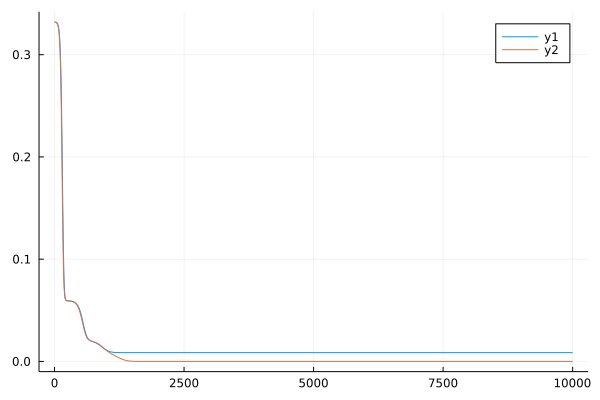

In [145]:
main()